EAS directory: /Volumes/lacie/data/swa/eas/2020/L2/bm/psd
EAS filename: solo_L2_swa-eas-pad-psd_20200624T053335-20200624T063334_V02_revB.cdf
MAG directory: /Volumes/lacie/data/mag/2020/L2/bm
MAG filename: solo_L2_mag-srf-burst_20200624_V03.cdf
Output directory: /Volumes/lacie/data/swa/eas/2020/L3/bm/pitch_angle

3 BM events found.
Calculating pitch angle index 1 of 36
Calculating pitch angle index 2 of 36
Calculating pitch angle index 3 of 36
Calculating pitch angle index 4 of 36
Calculating pitch angle index 5 of 36
Calculating pitch angle index 6 of 36
Calculating pitch angle index 7 of 36
Calculating pitch angle index 8 of 36
Calculating pitch angle index 9 of 36
Calculating pitch angle index 10 of 36
Calculating pitch angle index 11 of 36
Calculating pitch angle index 12 of 36
Calculating pitch angle index 13 of 36
Calculating pitch angle index 14 of 36
Calculating pitch angle index 15 of 36
Calculating pitch angle index 16 of 36
Calculating pitch angle index 17 of 36
Calculating p

/var/folders/z5/q_vgztyd74lcfdrvs_tmx0sh0000gp/T/ipykernel_2936/1397801273.py:490: RuntimeWarning: Mean of empty slice
  data_rebin_mean[i] = np.nanmean(data_rebin_grid[i, :])
/Users/cwk/opt/anaconda3/lib/python3.8/site-packages/spacepy/pycdf/__init__.py:1974: DeprecationWarning: spacepy.pycdf.lib.set_backward not called; making v3-compatible CDF.
  warnings.warn(
/Users/cwk/opt/anaconda3/lib/python3.8/site-packages/spacepy/pycdf/__init__.py:2456: DeprecationWarning: No type specified for time input; assuming CDF_TIME_TT2000.
  warnings.warn(


Acknowledgement: Solar Orbiter is a space mission of international collaboration between ESA and NASA, operated by ESA Solar Orbiter Solar Wind Analyser (SWA) data are derived from scientific sensors which have been designed and created, and are operated under funding provided in numerous contracts from the UK Space Agency (UKSA), the UK Science and Technology Facilities Council (STFC), the Agenzia Spaziale Italiana (ASI), the Centre National d'etudes Spatiales (CNES, France), the Centre National de la Recherche Scientifique (CNRS, France), the Czech contribution to the ESA PRODEX programme and NASA. [CDF_CHAR]
Data_product: bmpad-psd>Re-binned pitch angle data in psd units [CDF_CHAR]
Data_type: L3>Level 3 re-binned electron pitch angle data [CDF_CHAR]
Data_version: 01 [CDF_CHAR]
Descriptor: swa-eas-bmpad-psd [CDF_CHAR]
Discipline: Space Physics>Interplanetary Studies [CDF_CHAR]
Generated_by: MSSL-UCL [CDF_CHAR]
Generation_date: 2022-09-06T09:22:33Z [CDF_CHAR]
Instrument: SWA-EAS>Solar

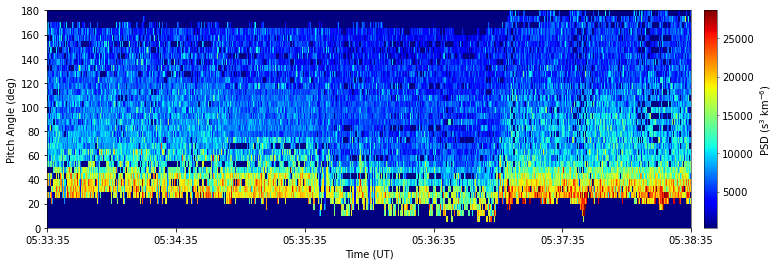

Calculating pitch angle index 1 of 36
Calculating pitch angle index 2 of 36
Calculating pitch angle index 3 of 36
Calculating pitch angle index 4 of 36
Calculating pitch angle index 5 of 36
Calculating pitch angle index 6 of 36
Calculating pitch angle index 7 of 36
Calculating pitch angle index 8 of 36
Calculating pitch angle index 9 of 36
Calculating pitch angle index 10 of 36
Calculating pitch angle index 11 of 36
Calculating pitch angle index 12 of 36
Calculating pitch angle index 13 of 36
Calculating pitch angle index 14 of 36
Calculating pitch angle index 15 of 36
Calculating pitch angle index 16 of 36
Calculating pitch angle index 17 of 36
Calculating pitch angle index 18 of 36
Calculating pitch angle index 19 of 36
Calculating pitch angle index 20 of 36
Calculating pitch angle index 21 of 36
Calculating pitch angle index 22 of 36
Calculating pitch angle index 23 of 36
Calculating pitch angle index 24 of 36
Calculating pitch angle index 25 of 36
Calculating pitch angle index 26 o

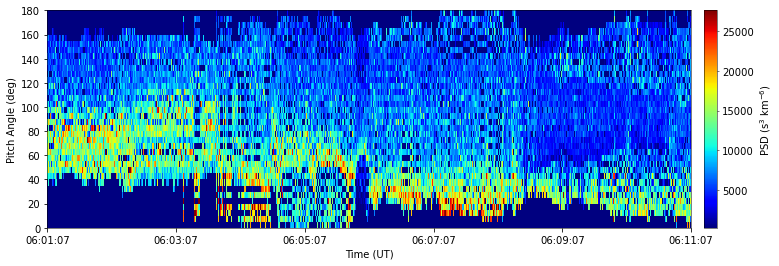

Calculating pitch angle index 1 of 36
Calculating pitch angle index 2 of 36
Calculating pitch angle index 3 of 36
Calculating pitch angle index 4 of 36
Calculating pitch angle index 5 of 36
Calculating pitch angle index 6 of 36
Calculating pitch angle index 7 of 36
Calculating pitch angle index 8 of 36
Calculating pitch angle index 9 of 36
Calculating pitch angle index 10 of 36
Calculating pitch angle index 11 of 36
Calculating pitch angle index 12 of 36
Calculating pitch angle index 13 of 36
Calculating pitch angle index 14 of 36
Calculating pitch angle index 15 of 36
Calculating pitch angle index 16 of 36
Calculating pitch angle index 17 of 36
Calculating pitch angle index 18 of 36
Calculating pitch angle index 19 of 36
Calculating pitch angle index 20 of 36
Calculating pitch angle index 21 of 36
Calculating pitch angle index 22 of 36
Calculating pitch angle index 23 of 36
Calculating pitch angle index 24 of 36
Calculating pitch angle index 25 of 36
Calculating pitch angle index 26 o

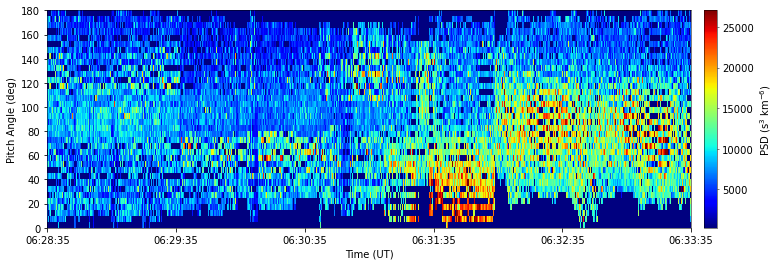

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
""" generate_level3_data.py: Program to generate Level 3 Solar Wind Analyser -
Electron Analyser System Burst Mode data.

Input:
    - Level 2 Electron Analyser System (EAS) Burst Mode data
    - Level 2 Magnetometer (MAG) Burst Mode data
Process:
    - Convert the MAG data into the EAS reference frame
    - Calculate the electron pitch angle distribution
    - Rebin the EAS data into pitch angle space
    - Write the rebinned data to CDF
Output:
    - Level 3 EAS BM data
    - Pitch angle versus time plot of the new data
"""

__author__ = "Christopher W Kelly"
__contact__ = "ckelly7864@gmail.com"
__date__ = "2022/09/05"
__version__ = "00.01.00"

from spacepy import pycdf
import os
import numpy as np
import math
import datetime
from datetime import timedelta
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable


def main():
    
    # Take the directory paths and filenames.
    directory_eas = input('EAS directory: ')
    filename_eas = input('EAS filename: ')
    directory_mag = input('MAG directory: ')
    filename_mag = input('MAG filename: ')    
    directory_output = input('Output directory: ')
    
    # Load the EAS Level 2 BM data variables.
    cdf_file = pycdf.CDF('%s/%s' %(directory_eas, filename_eas))
    epoch_eas = cdf_file['EPOCH'][...]
    electron_data = cdf_file['SWA_EAS_PAD_PSD_Data'][...]
    elevation = cdf_file['SWA_EAS_ELEVATION'][...]
    azimuth = cdf_file['SWA_EAS_AZIMUTH'][...]
    energy = cdf_file['SWA_EAS_ENERGY'][...]
    energy_delta_upper = cdf_file['SWA_EAS_ENERGY_delta_upper'][...]
    energy_delta_lower = cdf_file['SWA_EAS_ENERGY_delta_lower'][...]
    eas_to_srf = cdf_file['EAS_TO_SRF'][...]
    quality_flag = cdf_file['QUALITY_FLAG'][...]
    quality_bitmask = cdf_file['QUALITY_BITMASK'][...]
    cdf_file.close()
    
    # Load the MAG Level 2 BM data variables.
    cdf_file = pycdf.CDF('%s/%s' %(directory_mag, filename_mag))
    epoch_mag = cdf_file['EPOCH'][...]
    magnetic_field_data = cdf_file['B_SRF'][...]
    cdf_file.close()
    
    # Retrieve the number of BM events and their start and finish indices.
    start_idx = [0]
    for i in range(1, len(epoch_eas)):
        if (epoch_eas[i] - epoch_eas[i - 1]).total_seconds() > 10:
            start_idx.append(i)
    end_idx = []
    for i in range(0, len(start_idx)):
        if i < len(start_idx) - 1:
            end_idx.append(start_idx[i + 1])
        else:
            end_idx.append(len(epoch_eas))
    print('\n%i BM events found.' %len(start_idx))

    # Run the processing code separately for each BM event.
    for event in range(0, len(start_idx)):
        
        # Set the start, end and duration indices of the given BM event.
        t1 = start_idx[event]
        t2 = end_idx[event]
        period = t2 - t1
        
        # Load the ProcessTools class.
        processtools = ProcessTools(period)
        
        # Interpolate the MAG data onto the EAS data timesteps.
        magnetic_field = processtools.interp_mag_data(epoch_eas, epoch_mag, 
                         magnetic_field_data)
        
        # Regrid the MAG data into the EAS reference frames.
        magnetic_field_regrid = processtools.regrid_mag_data(eas_to_srf,
                                magnetic_field)  
        
        # Split the EAS data for each event time period into each elevation.
        electron_data_band1 = electron_data[t1:t2, 0, :, :]
        electron_data_band2 = electron_data[t1:t2, 1, :, :]
    
        # Calculate the Pitch Angle Distribution (PAD) angles.
        pad_angles = processtools.calc_pitch_angle(magnetic_field_regrid,
                     elevation[t1:t2, :], azimuth) 
    
        # Rebin the EAS data into 5 degree bins in pitch angle space.
        pad_bins = np.arange(0, 185, 5)
        electron_pad_data = processtools.rebin_eas_data(pad_bins, pad_angles,
                            electron_data_band1, electron_data_band2)

        #######################################################################
        # Write the rebinned EAS pitch angle data to CDF.

        # Prepare the additional variables and metadata.    
        pad_mids = np.zeros([36])
        for i in range(0, len(pad_mids)):
            pad_mids[i] = (pad_bins[i] + pad_bins[i + 1]) / 2        
        pitch_angle = np.tile(pad_mids, (len(epoch_eas), 1))[t1:t2, :]
        pitch_angle_delta_upper = np.tile(pitch_angle[0, 0], (len(epoch_eas), 
                                  len(pad_mids)))[t1:t2, :]
        pitch_angle_delta_lower = np.tile(pitch_angle[0, 0], (len(epoch_eas),
                                  len(pad_mids)))[t1:t2, :]
        pad_coverage_quality = np.ones([1])
        now = datetime.datetime.now()
        project = ['Solar Orbiter']
        project.append('Cosmic Visions')
        t1_str = str(epoch_eas[t1])[:19].replace('-', '').replace(' ', 'T')\
                 .replace(':', '')
        t2_str = str(epoch_eas[t2 - 1])[:19].replace('-', '')\
                 .replace(' ', 'T').replace(':', '')
        
        # Set the Level 3 data product filename.
        filename_output = 'solo_L3_swa-eas-bmpad-psd_%s-%s_V01.cdf' %(t1_str, \
                          t2_str)
        if os.path.exists('%s/%s' %(directory_output, filename_output)):
            os.remove('%s/%s' %(directory_output, filename_output))        
        cdf = pycdf.CDF('%s/%s' %(directory_output, filename_output), '')

        # Add the variables to the file.
        cdf['EPOCH'] = epoch_eas[t1:t2]
        cdf['SWA_EAS_BMPAD_PSD_Data'] = electron_pad_data
        cdf['SWA_EAS_PITCH_ANGLE'] = pitch_angle
        cdf['SWA_EAS_PITCH_ANGLE_delta_upper'] = pitch_angle_delta_upper
        cdf['SWA_EAS_PITCH_ANGLE_delta_lower'] = pitch_angle_delta_lower
        cdf['SWA_EAS_ENERGY'] = energy[t1:t2, :]
        cdf['SWA_EAS_ENERGY_delta_upper'] = energy_delta_upper[t1:t2, :]
        cdf['SWA_EAS_ENERGY_delta_lower'] = energy_delta_lower[t1:t2, :]
        cdf['PAD_COVERAGE_QUALITY'] = pad_coverage_quality
        cdf['QUALITY_FLAG'] = quality_flag[t1:t2]
        cdf['QUALITY_BITMASK'] = quality_bitmask[t1:t2]
        
        # Set the global attributes.
        cdf.attrs['Project'] = project
        cdf.attrs['Source_name'] = 'SOLO>Solar Orbiter'
        cdf.attrs['Discipline'] = 'Space Physics>Interplanetary Studies'
        cdf.attrs['Data_type'] = ('L3>Level 3 re-binned electron pitch angle '
            'data')
        cdf.attrs['Descriptor'] = 'swa-eas-bmpad-psd'
        cdf.attrs['Data_version'] = '01'
        cdf.attrs['Software_version'] = '00.01.00'
        cdf.attrs['Instrument_type'] = 'Plasma and Solar Wind'
        cdf.attrs['Mission_group'] = 'Solar Orbiter'
        cdf.attrs['Logical_source'] = 'solo_L3_swa-eas-bmpad-psd'
        cdf.attrs['Logical_file_id'] = ('solo_L3_swa-eas-bmpad-psd_YYYYMMDDThh'
            'mmss-YYYYMMDDThhmmss_Vxx')
        cdf.attrs['Logical_source_description'] = ('SWA-EAS pitch angles from '
            '3D psd data')
        cdf.attrs['Parents'] = ('solo_L2_swa-eas-pad-psd_20200624T053335-20200'
            '624T063334_V02_revB.cdf', 'solo_L2_mag-srf-burst_20200624_V03'
            '.cdf')
        cdf.attrs['Rules_of_use'] = ('Current best quality data - see caveats '
            'file or contact SWA/EAS team for information on use')
        cdf.attrs['Generated_by'] = 'MSSL-UCL'
        cdf.attrs['Generation_date'] = now.strftime('%Y-%m-%dT%H:%M:%SZ')
        cdf.attrs['Mods'] = 'V01 first version'
        cdf.attrs['Data_product'] = ('bmpad-psd>Re-binned pitch angle data in '
            'psd units')
        cdf.attrs['Level'] = 'L3>Level 3 Data'
        cdf.attrs['Instrument'] = ('SWA-EAS>Solar Wind Analyser-Electron '
            'Analyser System')
        cdf.attrs['TEXT'] = 'https://doi.org/10.1051/0004-6361/201937259'
        cdf.attrs['Acknowledgement'] = ('Solar Orbiter is a space mission of '
            'international collaboration between ESA and NASA, operated by '
            'ESA Solar Orbiter Solar Wind Analyser (SWA) data are derived '
            'from scientific sensors which have been designed and created, '
            'and are operated under funding provided in numerous contracts '
            'from the UK Space Agency (UKSA), the UK Science and Technology '
            'Facilities Council (STFC), the Agenzia Spaziale Italiana (ASI), '
            'the Centre National d\'etudes Spatiales (CNES, France), the '
            'Centre National de la Recherche Scientifique (CNRS, France), the '
            'Czech contribution to the ESA PRODEX programme and NASA.')
        cdf.attrs['OBS_ID'] = 'xxxx_xxxx_xxx_xxx_xxxx_xxx'
        cdf.attrs['SOOP_TYPE'] = 'XXX'
        
        # Set the variable attributes.
        cdf['EPOCH'].attrs['FIELDNAM'] = 'EPOCH'
        cdf['EPOCH'].attrs['CATDESC'] = ('Epoch in nano-seconds since J2000, '
            'encoded as terrestrial time on rotating Earth Geoid')
        cdf['EPOCH'].attrs['DISPLAY_TYPE'] = 'time_series'
        cdf['EPOCH'].attrs['FILLVAL'] = datetime.datetime(9999, 12, 31, 23, 59,
                                        59, 999999)
        cdf['EPOCH'].attrs['FORMAT'] = 'I20'
        cdf['EPOCH'].attrs['LABLAXIS'] = 'EAS EPOCH'
        cdf['EPOCH'].attrs['UNITS'] = 'ns'
        cdf['EPOCH'].attrs['VALIDMIN'] = datetime.datetime(2019, 12, 31, 23, 
                                         59, 59, 990000)
        cdf['EPOCH'].attrs['VALIDMAX'] = datetime.datetime(2039, 12, 31, 23,
                                         59, 59, 816000)
        cdf['EPOCH'].attrs['SCALEMIN'] = min(epoch_eas[t1:t2])
        cdf['EPOCH'].attrs['SCALEMAX'] = max(epoch_eas[t1:t2])
        cdf['EPOCH'].attrs['SCALETYP'] = 'linear'
        cdf['EPOCH'].attrs['VAR_TYPE'] = 'support_data'
        cdf['EPOCH'].attrs['VAR_NOTES'] = ('The EAS time tag is from the '
        'center of the acquisition interval which is 1 sec')
        cdf['EPOCH'].attrs['SI_CONVERSION'] = '1E-09>s'
        
        cdf['SWA_EAS_BMPAD_PSD_Data'].attrs['FIELDNAM'] = 'swa-eas-bmpad-psd'
        cdf['SWA_EAS_BMPAD_PSD_Data'].attrs['CATDESC'] = ('Electron pitch '
            'angle data - Phase Space')
        cdf['SWA_EAS_BMPAD_PSD_Data'].attrs['DISPLAY_TYPE'] = 'spectrogram'
        cdf['SWA_EAS_BMPAD_PSD_Data'].attrs['FILLVAL'] = -1.0e+31
        cdf['SWA_EAS_BMPAD_PSD_Data'].attrs['FORMAT'] = 'f14.6'
        cdf['SWA_EAS_BMPAD_PSD_Data'].attrs['LABLAXIS'] = 'Phase Space Density'
        cdf['SWA_EAS_BMPAD_PSD_Data'].attrs['UNITS'] = 's^3 km^-6'
        cdf['SWA_EAS_BMPAD_PSD_Data'].attrs['VALIDMIN'] = 1.0e-05
        cdf['SWA_EAS_BMPAD_PSD_Data'].attrs['VALIDMAX'] = 1.0e+08
        cdf['SWA_EAS_BMPAD_PSD_Data'].attrs['SCALEMIN'] = 1.0e-05
        cdf['SWA_EAS_BMPAD_PSD_Data'].attrs['SCALEMAX'] = 1.0e+08
        cdf['SWA_EAS_BMPAD_PSD_Data'].attrs['SCALETYP'] = 'log'
        cdf['SWA_EAS_BMPAD_PSD_Data'].attrs['DEPEND_0'] = 'EPOCH'
        cdf['SWA_EAS_BMPAD_PSD_Data'].attrs['DEPEND_1'] = 'SWA_EAS_ENERGY'
        cdf['SWA_EAS_BMPAD_PSD_Data'].attrs['DEPEND_2'] = 'SWA_EAS_PITCH_ANGLE'
        cdf['SWA_EAS_BMPAD_PSD_Data'].attrs['COORDINATE_SYSTEM'] = ('magnetic_'
            'field_aligned')
        cdf['SWA_EAS_BMPAD_PSD_Data'].attrs['VAR_TYPE'] = 'data'
        cdf['SWA_EAS_BMPAD_PSD_Data'].attrs['SI_CONVERSION'] = '1E-18>s^3 m^-6'
        
        cdf['SWA_EAS_PITCH_ANGLE'].attrs['FIELDNAM'] = 'EAS Pitch Angle'
        cdf['SWA_EAS_PITCH_ANGLE'].attrs['CATDESC'] = ('The Electron pitch '
            'angles derived from 3D data and calibrated magnetic field data '
            'in PSD units')
        cdf['SWA_EAS_PITCH_ANGLE'].attrs['FILLVAL'] = -1.0e+31
        cdf['SWA_EAS_PITCH_ANGLE'].attrs['FORMAT'] = 'f14.4'
        cdf['SWA_EAS_PITCH_ANGLE'].attrs['LABLAXIS'] = 'Electron Pitch Angle'
        cdf['SWA_EAS_PITCH_ANGLE'].attrs['UNITS'] = 'Degrees'
        cdf['SWA_EAS_PITCH_ANGLE'].attrs['VALIDMIN'] = 0.0
        cdf['SWA_EAS_PITCH_ANGLE'].attrs['VALIDMAX'] = 180.0
        cdf['SWA_EAS_PITCH_ANGLE'].attrs['SCALEMIN'] = 0.0
        cdf['SWA_EAS_PITCH_ANGLE'].attrs['SCALEMAX'] = 180.0
        cdf['SWA_EAS_PITCH_ANGLE'].attrs['SCALETYP'] = 'linear'
        cdf['SWA_EAS_PITCH_ANGLE'].attrs['DEPEND_0'] = 'EPOCH'
        cdf['SWA_EAS_PITCH_ANGLE'].attrs['VAR_TYPE'] = 'support_data'
        
        cdf['SWA_EAS_PITCH_ANGLE_delta_upper'].attrs['FIELDNAM'] = ('EAS '
            'pitch angle delta upper')
        cdf['SWA_EAS_PITCH_ANGLE_delta_upper'].attrs['CATDESC'] = ('Upper '
            'half width of pitch angle bin')
        cdf['SWA_EAS_PITCH_ANGLE_delta_upper'].attrs['FILLVAL'] = -1.0e+31
        cdf['SWA_EAS_PITCH_ANGLE_delta_upper'].attrs['FORMAT'] = 'f14.4'
        cdf['SWA_EAS_PITCH_ANGLE_delta_upper'].attrs['UNITS'] = 'Degrees'
        cdf['SWA_EAS_PITCH_ANGLE_delta_upper'].attrs['VALIDMIN'] = 0.0
        cdf['SWA_EAS_PITCH_ANGLE_delta_upper'].attrs['VALIDMAX'] = 12.0
        cdf['SWA_EAS_PITCH_ANGLE_delta_upper'].attrs['SCALEMIN'] = 0.0
        cdf['SWA_EAS_PITCH_ANGLE_delta_upper'].attrs['SCALEMAX'] = 12.0
        cdf['SWA_EAS_PITCH_ANGLE_delta_upper'].attrs['SCALETYP'] = 'linear'
        cdf['SWA_EAS_PITCH_ANGLE_delta_upper'].attrs['DEPEND_0'] = 'EPOCH'
        cdf['SWA_EAS_PITCH_ANGLE_delta_upper'].attrs['VAR_TYPE'] = ('support_'
            'data')
        
        cdf['SWA_EAS_PITCH_ANGLE_delta_lower'].attrs['FIELDNAM'] = ('EAS '
            'pitch angle delta lower')
        cdf['SWA_EAS_PITCH_ANGLE_delta_lower'].attrs['CATDESC'] = ('Lower '
            'half width of pitch angle bin')
        cdf['SWA_EAS_PITCH_ANGLE_delta_lower'].attrs['FILLVAL'] = -1.0e+31
        cdf['SWA_EAS_PITCH_ANGLE_delta_lower'].attrs['FORMAT'] = 'f14.4'
        cdf['SWA_EAS_PITCH_ANGLE_delta_lower'].attrs['UNITS'] = 'Degrees'
        cdf['SWA_EAS_PITCH_ANGLE_delta_lower'].attrs['VALIDMIN'] = 0.0
        cdf['SWA_EAS_PITCH_ANGLE_delta_lower'].attrs['VALIDMAX'] = 12.0
        cdf['SWA_EAS_PITCH_ANGLE_delta_lower'].attrs['SCALEMIN'] = 0.0
        cdf['SWA_EAS_PITCH_ANGLE_delta_lower'].attrs['SCALEMAX'] = 12.0
        cdf['SWA_EAS_PITCH_ANGLE_delta_lower'].attrs['SCALETYP'] = 'linear'
        cdf['SWA_EAS_PITCH_ANGLE_delta_lower'].attrs['DEPEND_0'] = 'EPOCH'
        cdf['SWA_EAS_PITCH_ANGLE_delta_lower'].attrs['VAR_TYPE'] = ('support_'
            'data')
        
        cdf['SWA_EAS_ENERGY'].attrs['FIELDNAM'] = 'EAS Centre Energy'
        cdf['SWA_EAS_ENERGY'].attrs['CATDESC'] = ('The representative centre '
            'energy for the accumulation bin')
        cdf['SWA_EAS_ENERGY'].attrs['DISPLAY_TYPE'] = 'Spectrogram'
        cdf['SWA_EAS_ENERGY'].attrs['FILLVAL'] = -1.0e+31
        cdf['SWA_EAS_ENERGY'].attrs['FORMAT'] = 'f14.4'
        cdf['SWA_EAS_ENERGY'].attrs['LABLAXIS'] = 'Energy'
        cdf['SWA_EAS_ENERGY'].attrs['UNITS'] = 'ElectronVolts'
        cdf['SWA_EAS_ENERGY'].attrs['VALIDMIN'] = 0.0
        cdf['SWA_EAS_ENERGY'].attrs['VALIDMAX'] = 6000.0
        cdf['SWA_EAS_ENERGY'].attrs['SCALEMIN'] = 0.0
        cdf['SWA_EAS_ENERGY'].attrs['SCALEMAX'] = 6000.0
        cdf['SWA_EAS_ENERGY'].attrs['SCALETYP'] = 'log'
        cdf['SWA_EAS_ENERGY'].attrs['DEPEND_0'] = 'EPOCH'
        cdf['SWA_EAS_ENERGY'].attrs['VAR_TYPE'] = 'support_data'
        cdf['SWA_EAS_ENERGY'].attrs['SI_CONVERSION'] = '1.60217646E-19>J'
        
        cdf['SWA_EAS_ENERGY_delta_upper'].attrs['FIELDNAM'] = ('EAS Energy '
            'upper delta')
        cdf['SWA_EAS_ENERGY_delta_upper'].attrs['CATDESC'] = ('Upper half '
            'width of energy bin')
        cdf['SWA_EAS_ENERGY_delta_upper'].attrs['FILLVAL'] = -1.0e+31
        cdf['SWA_EAS_ENERGY_delta_upper'].attrs['FORMAT'] = 'f14.4'
        cdf['SWA_EAS_ENERGY_delta_upper'].attrs['UNITS'] = 'ElectronVolts'
        cdf['SWA_EAS_ENERGY_delta_upper'].attrs['VALIDMIN'] = 0.0
        cdf['SWA_EAS_ENERGY_delta_upper'].attrs['VALIDMAX'] = 1000.0
        cdf['SWA_EAS_ENERGY_delta_upper'].attrs['SCALEMIN'] = 0.0
        cdf['SWA_EAS_ENERGY_delta_upper'].attrs['SCALEMAX'] = 1000.0
        cdf['SWA_EAS_ENERGY_delta_upper'].attrs['SCALETYP'] = 'linear'
        cdf['SWA_EAS_ENERGY_delta_upper'].attrs['DEPEND_0'] = 'EPOCH'
        cdf['SWA_EAS_ENERGY_delta_upper'].attrs['VAR_TYPE'] = 'support_data'
        
        cdf['SWA_EAS_ENERGY_delta_lower'].attrs['FIELDNAM'] = ('EAS Energy '
            'lower delta')
        cdf['SWA_EAS_ENERGY_delta_lower'].attrs['CATDESC'] = ('Lower half '
            'width of energy bin')
        cdf['SWA_EAS_ENERGY_delta_lower'].attrs['FILLVAL'] = -1.0e+31
        cdf['SWA_EAS_ENERGY_delta_lower'].attrs['FORMAT'] = 'f14.4'
        cdf['SWA_EAS_ENERGY_delta_lower'].attrs['UNITS'] = 'ElectronVolts'
        cdf['SWA_EAS_ENERGY_delta_lower'].attrs['VALIDMIN'] = 0.0
        cdf['SWA_EAS_ENERGY_delta_lower'].attrs['VALIDMAX'] = 1000.0
        cdf['SWA_EAS_ENERGY_delta_lower'].attrs['SCALEMIN'] = 0.0
        cdf['SWA_EAS_ENERGY_delta_lower'].attrs['SCALEMAX'] = 1000.0
        cdf['SWA_EAS_ENERGY_delta_lower'].attrs['SCALETYP'] = 'linear'
        cdf['SWA_EAS_ENERGY_delta_lower'].attrs['DEPEND_0'] = 'EPOCH'
        cdf['SWA_EAS_ENERGY_delta_lower'].attrs['VAR_TYPE'] = 'support_data'
    
        cdf['PAD_COVERAGE_QUALITY'].attrs['FIELDNAM'] = 'PAD Coverage Quality'
        cdf['PAD_COVERAGE_QUALITY'].attrs['CATDESC'] = ('Mean PAD Coverage '
            'Quality score for BM event')
        cdf['PAD_COVERAGE_QUALITY'].attrs['FILLVAL'] = 255
        cdf['PAD_COVERAGE_QUALITY'].attrs['FORMAT'] = 'I3'
        cdf['PAD_COVERAGE_QUALITY'].attrs['LABLAXIS'] = 'PAD coverage quality'
        cdf['PAD_COVERAGE_QUALITY'].attrs['UNITS'] = ' '
        cdf['PAD_COVERAGE_QUALITY'].attrs['VALIDMIN'] = 0
        cdf['PAD_COVERAGE_QUALITY'].attrs['VALIDMAX'] = 4
        cdf['PAD_COVERAGE_QUALITY'].attrs['SCALEMIN'] = 0
        cdf['PAD_COVERAGE_QUALITY'].attrs['SCALEMAX'] = 4
        cdf['PAD_COVERAGE_QUALITY'].attrs['SCALETYP'] = 'linear'
        cdf['PAD_COVERAGE_QUALITY'].attrs['VAR_TYPE'] = 'support_data'
        
        cdf['QUALITY_FLAG'].attrs['FIELDNAM'] = 'EAS Data Quality'
        cdf['QUALITY_FLAG'].attrs['CATDESC'] = 'EAS Data Quality flag'
        cdf['QUALITY_FLAG'].attrs['DISPLAY_TYPE'] = 'time_series'
        cdf['QUALITY_FLAG'].attrs['FILLVAL'] = 255
        cdf['QUALITY_FLAG'].attrs['FORMAT'] = 'I3'
        cdf['QUALITY_FLAG'].attrs['LABLAXIS'] = 'EAS data quality'
        cdf['QUALITY_FLAG'].attrs['UNITS'] = ' '
        cdf['QUALITY_FLAG'].attrs['VALIDMIN'] = 0
        cdf['QUALITY_FLAG'].attrs['VALIDMAX'] = 4
        cdf['QUALITY_FLAG'].attrs['SCALEMIN'] = 0
        cdf['QUALITY_FLAG'].attrs['SCALEMAX'] = 4
        cdf['QUALITY_FLAG'].attrs['SCALETYP'] = 'linear'
        cdf['QUALITY_FLAG'].attrs['DEPEND_0'] = 'EPOCH'
        cdf['QUALITY_FLAG'].attrs['VAR_TYPE'] = 'support_data'
        
        cdf['QUALITY_BITMASK'].attrs['FIELDNAM'] = 'EAS Data Quality'
        cdf['QUALITY_BITMASK'].attrs['CATDESC'] = 'EAS Data Quality BITMASK'
        cdf['QUALITY_BITMASK'].attrs['DISPLAY_TYPE'] = 'time_series'
        cdf['QUALITY_BITMASK'].attrs['FILLVAL'] = 255
        cdf['QUALITY_BITMASK'].attrs['FORMAT'] = 'I3'
        cdf['QUALITY_BITMASK'].attrs['LABLAXIS'] = 'EAS data quality'
        cdf['QUALITY_BITMASK'].attrs['UNITS'] = ' '
        cdf['QUALITY_BITMASK'].attrs['VALIDMIN'] = 0
        cdf['QUALITY_BITMASK'].attrs['VALIDMAX'] = 65535
        cdf['QUALITY_BITMASK'].attrs['SCALEMIN'] = 0
        cdf['QUALITY_BITMASK'].attrs['SCALEMAX'] = 4
        cdf['QUALITY_BITMASK'].attrs['SCALETYP'] = 'linear'
        cdf['QUALITY_BITMASK'].attrs['DEPEND_0'] = 'EPOCH'
        cdf['QUALITY_BITMASK'].attrs['VAR_TYPE'] = 'support_data'
        cdf['QUALITY_BITMASK'].attrs['VAR_NOTES'] = ('This bitwise variable '
            'is used to indicate EAS data quality in detail. Details not '
            'finalized yet.')
        cdf.close()
        #######################################################################

        # Load the ValidationTools class.
        validationtools = ValidationTools(directory_output, filename_output)
        
        # Run the validation tools on new Level 3 data product.
        validationtools.print_metadata()
        validationtools.plot_pad_data()


class ProcessTools:
    """Tools for performing the individual stages of the Level 3 data
    generation.
    """
    
    def __init__(self, steps):
        self.steps = steps
 
    def interp_mag_data(self, new_scale, old_scale, data):
        """Interpolate the magnetic field data onto new timesteps."""
        new_scale_datenum = mdates.date2num(new_scale)
        old_scale_datenum = mdates.date2num(old_scale)
        data_interp = np.zeros([len(new_scale), 3])
        for time in range(0, self.steps):
            for axis in range(0, 3):
                data_interp[time, axis] = np.interp(new_scale_datenum[time], 
                                          old_scale_datenum[:], data[:, axis])
        return data_interp
    
    def regrid_mag_data(self, rot_matrix, data):
        """Regrid the magnetic field data from the cartesian spacecraft
        reference frame to the spherical polar Electron Analyser System
        reference frames.
        """
        # Apply the rotation matrix.
        data_rot = np.zeros([self.steps, 3])
        for time in range(0, self.steps):            
            data_rot[time, :] = np.matmul(np.linalg.inv(
                                rot_matrix[time, :, :]), data[time, :])
            
        # Convert the data from cartesian to spherical polar coordinates.
        data_regrid = np.zeros([self.steps, 3])
        for time in range(0, self.steps):
            data_regrid[time, 0] = np.sqrt(data_rot[time, 0]**2
                                   + data_rot[time, 1]**2
                                   + data_rot[time, 2]**2)
            data_regrid[time, 1] = math.degrees(-math.asin((data_rot[time, 2]
                                   / np.sqrt(data_rot[time, 0]**2
                                   + data_rot[time, 1]**2
                                   + data_rot[time, 2]**2))))
            if data_rot[time, 0] >= 0:
                data_regrid[time, 2] = math.degrees(math.atan((
                                       data_rot[time, 1] / data_rot[time, 0])))
            elif data_rot[time, 0] < 0:
                data_regrid[time, 2] = math.degrees(math.atan((
                                       data_rot[time, 1]
                                       / data_rot[time, 0])) + math.pi)
        return data_regrid
    
    def calc_pitch_angle(self, field, elev, azim):
        """Calculate the pitch angles (the angle between the magnetic field 
        and the electron flow direction).
        """
        pad = np.zeros([self.steps, 2, 32])
        for time in range(0, self.steps):
            for theta in range(0, 2):
                for phi in range(0, 32):
                    pad[time, theta, phi] = math.degrees(math.acos((
                        math.cos(math.radians(elev[time, theta]))
                        * math.cos(math.radians(field[time, 1]))
                        * math.cos(math.radians(azim[phi])
                        - math.radians(field[time, 2])))
                        + (math.sin(math.radians(elev[time, theta]))
                        * math.sin(math.radians(field[time, 1])))))
        return pad
    
    def rebin_eas_data(self, bins, angles, data_band1, data_band2):
        """Rebin the electron data into 5 degree bins in pitch angle space."""
        # Perform the rebinning.
        data_rebin_band = []
        data_rebin = []
        for pitch in range(0, 36):
            print('Calculating pitch angle index %i of 36' %(pitch + 1))
            for time in range(0, self.steps):
                for energy in range(0, 64):
                    for theta in range(0, 2):
                        for phi in range(0, 32):
                            if ((angles[time, theta, phi] >= bins[pitch]) and
                               (angles[time, theta, phi] < bins[pitch] + 5.0)):
                                if theta == 0:
                                    data_rebin_band.append(data_band1[time, 
                                    energy, phi])
                                if theta == 1:
                                    data_rebin_band.append(data_band2[time,
                                    energy, phi])
                            else:
                                continue
                    data_rebin.append(data_rebin_band)
                    data_rebin_band = []
        # Retrieve the maximum number of data entries contained in any bin.
        row_lengths = []
        for row in data_rebin:
            row_lengths.append(len(row))
        max_length = max(row_lengths)
        # Fill the empty bin spaces with NaNs.
        for row in data_rebin:
            while len(row) < max_length:
                row.append(np.NaN)
        data_rebin_grid = np.array(data_rebin)
        # Calculate the mean of each bin.
        data_rebin_mean = np.zeros([len(data_rebin)])
        for i in range(0, len(data_rebin)):
            data_rebin_mean[i] = np.nanmean(data_rebin_grid[i, :])
        # Reshape the data from a 1D array to a 2D array.
        data_rebin_reshape = data_rebin_mean.reshape((36, self.steps, 64))
        # Replace all the NaNs with fill values.
        data_rebin_fill = np.nan_to_num(data_rebin_reshape, nan = -1.0e+31)
        # Reorder the axes of the data array.
        data_rebin_reorder = data_rebin_fill.swapaxes(0, 1).swapaxes(1, 2)
        return data_rebin_reorder


class ValidationTools:
    """Tools for validating the contents of the generated Level 3 data."""
    
    def __init__(self, path, filename):
        self.path = path
        self.filename = filename

    def print_metadata(self):
        """Print the CDF global and variable attribute metadata."""
        cdf_file = pycdf.CDF('%s/%s' %(self.path, self.filename))
        print(cdf_file.attrs)
        print(cdf_file.keys())
        cdf_file.close()
        return
    
    def plot_pad_data(self):
        """Generate a pitch angle versus time plot of the Level 3 data."""
        # Load the EAS Level 3 BM data variables.
        cdf_file = pycdf.CDF('%s/%s' %(self.path, self.filename))
        epoch = cdf_file['EPOCH'][...]
        electron_pad_data = cdf_file['SWA_EAS_BMPAD_PSD_Data'][...]
        pitch_angle = cdf_file['SWA_EAS_PITCH_ANGLE'][...]
        cdf_file.close()
        # Sum over the halo and strahl electron energy ranges.
        electron_pad_sum = np.sum(electron_pad_data[:, 0:31, :], axis = 1).T
        # Calculate the required x-axis tick label frequency.
        if (epoch[-1] - epoch[0]).seconds < 300:
            steps = 1
        else:
            steps = 2
        xtick_list = []
        temp_time = epoch[0] - timedelta(minutes = steps)
        for i in range(0, 6):
            temp_time = temp_time + timedelta(minutes = steps)
            xtick_list.append(temp_time)
        # Generate the plot.
        plt.rcParams['font.size'] = 10
        plt.rcParams['axes.linewidth'] = 0.5
        plt.rcParams['lines.linewidth'] = 0.75
        fig = plt.figure(figsize = (12, 4))
        fig.subplots_adjust(hspace = 0.25)
        ax1 = fig.add_subplot(111)
        ax1.set_xlim(epoch[0], epoch[-1])
        ax1.set_xticks(xtick_list)
        xformatter = mdates.DateFormatter('%H:%M:%S')
        ax1.xaxis.set_major_formatter(xformatter)
        ax1.set_ylim(0, 180)
        ax1.set_yticks(np.arange(0, 200, 20))
        ax1.set_xlabel('Time (UT)')
        ax1.set_ylabel('Pitch Angle (deg)')
        x, y = np.meshgrid(epoch[:], pitch_angle[0, :])
        cb_max = np.nanmax(electron_pad_sum) / 1.5
        cb_min = cb_max / 100
        CS1 = ax1.pcolormesh(x[:, :], y[:, :], electron_pad_sum[:, :], 
              vmin = cb_min, vmax = cb_max, cmap = 'jet')
        ax1_divider = make_axes_locatable(ax1)
        cax1 = ax1_divider.append_axes('right', size='2%', pad='2%')
        cax1.tick_params(width = 0.5, length = 1.5)        
        cbar1 = plt.colorbar(CS1, cax = cax1, label = 'PSD '
                '($\mathregular{s^{3}}$ $\mathregular{km^{-6}}$)')
        cbar1.minorticks_off()
        plt.show()
        return


if __name__ == "__main__":
    # Start the program.
    main()